# Measure Widget

This page describes how to generate data outputs from measuring label images. Currently, labels are measured with `scikit-image.regionprops` and exported to a `.csv` file (which can be opened in any spreadsheet application or stats program). In addition, the user can specify two different sets of metadata to add additional information: 1) `ID Regex` which will parse information currently from the filename and the scene information; an example will be shown in `Example ID String`. 2) `Tx Map` can be used to add information based on a multi-well plate map. The `ID` mapped to is any column that can be created by `ID Regex` or the `Scene` information. 

In some ways, this widget is knowingly complex, however, it is certainly intended that a more advanced user can provide the proper `ID Regex` and `Tx Map` for a user for the experiments, and in the end create a summarized dataset. While the measure widget initially spits out a raw data file which will contain more rows than most datasets you are familiar with, since it is in 'long' format. In other words, each row represents a *single* object. 

Thus, to summarize your data on any measure of summary that you would like, use the `Grouping` tab and select the unique identifiers to summarize by. You will then select a column to `Count` which will tell you the number of labels in that group. Optionally, you can add `Aggregation Columns` to summarize all selected columns by the selected aggregation functions. For example, you may wish to know the `mean area` of all objects in your groups. 

21-Sep-24 11:32:12 - vispy    - WARNING  - QWindowsWindow::setGeometry: Unable to set geometry 1920x1310+1280+550 (frame: 1942x1366+1269+505) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 2882x1968+1283+564 (frame: 2904x2024+1272+519) margins: 11, 45, 11, 11 minimum size: 385x492 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=792,1040 maxtrack=0,0)


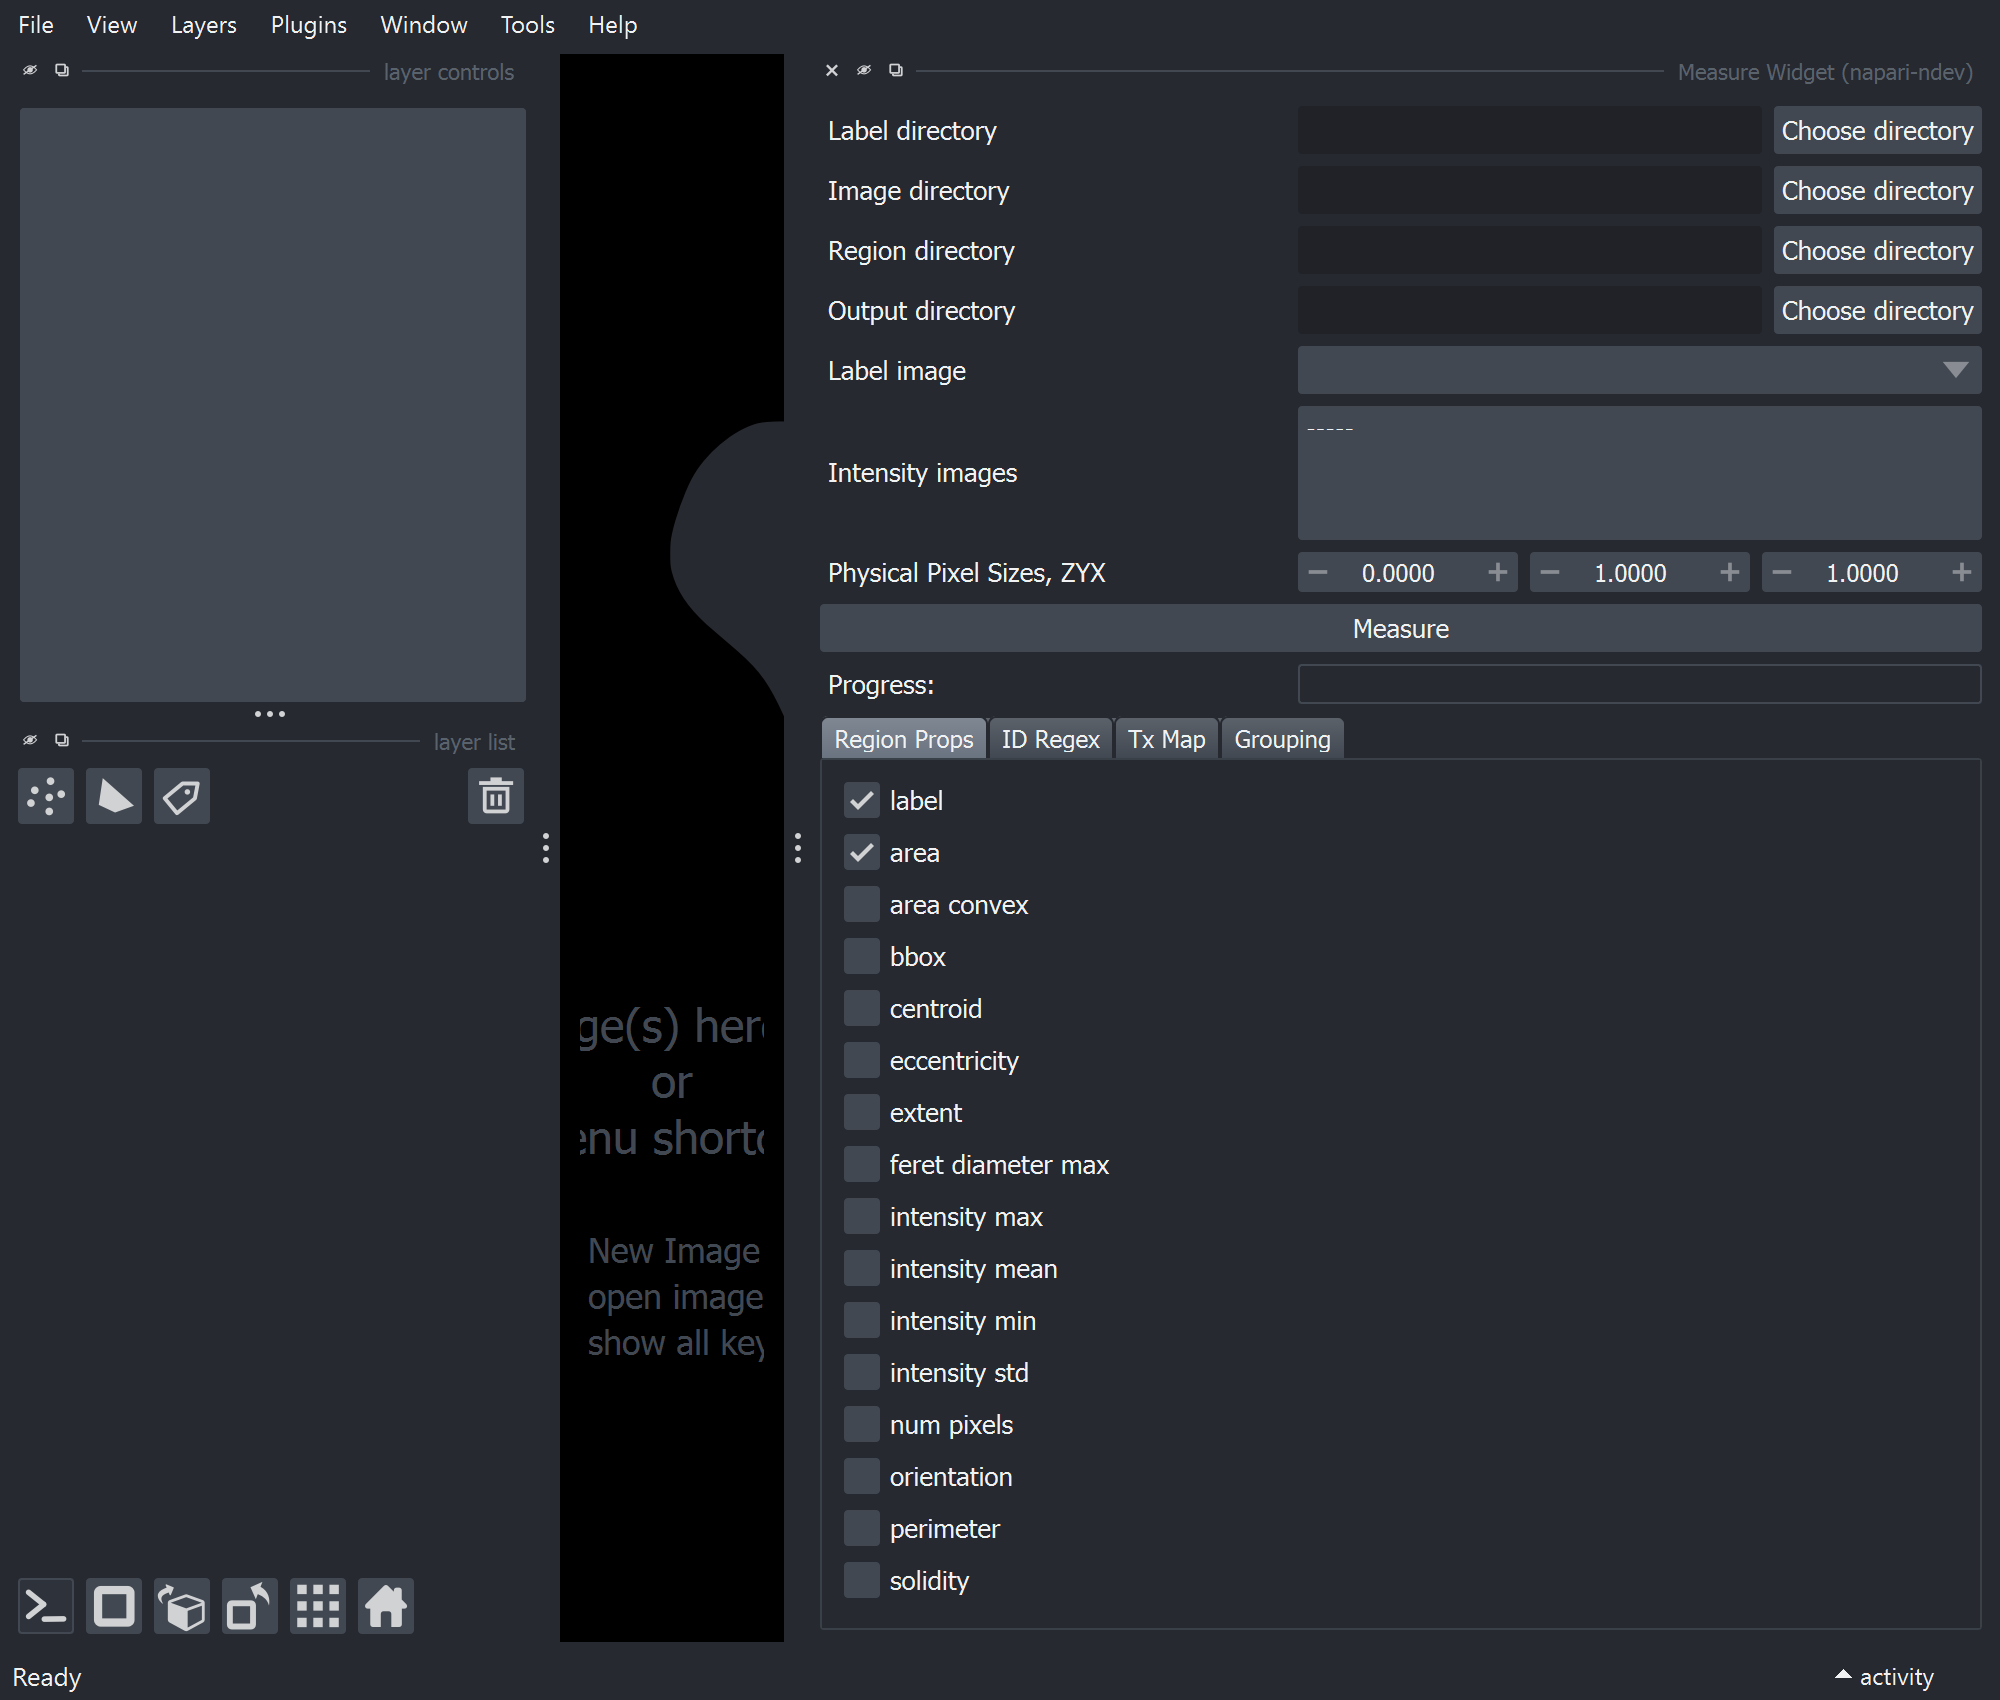

In [3]:
import napari
from napari.utils import nbscreenshot

viewer = napari.Viewer()
viewer.window.resize(1000,700) # w x h
viewer.window.add_plugin_dock_widget('napari-ndev', 'Measure Widget')
nbscreenshot(viewer)

## Example folder

The only required directory is the `label directory` whereby the objects that you want to measure are found. You should also select/make an `output directory` so that you know where your file is saved. 

Once you select the `label directory`, label names will populate both the `label image` dropdown and `intensity images`. The only required selection is a `label image` once this is done, you can hit the `Measure` button and will get the most minimal dataset possible. 

However, you can also add other intensity images (by loading an image or region directory, the reasoning for these namings will come in future tutorials) and select them in the widget to be measured against. Then, in `Region Props` tab you can select additional properties to measure. 

In this example I want to measure the `intensity max` of the corresponding `Labels: DAPI Class` because this will give me the 'type' of DAPI that is inside each `Morphology` object. This is because the background is 0, live is 1, and dead is 2. So, we can later filter by the 'DAPI Class' of each morphology object. In other words, intensity images don't have to be raw intensity values, but other labels can be used. 

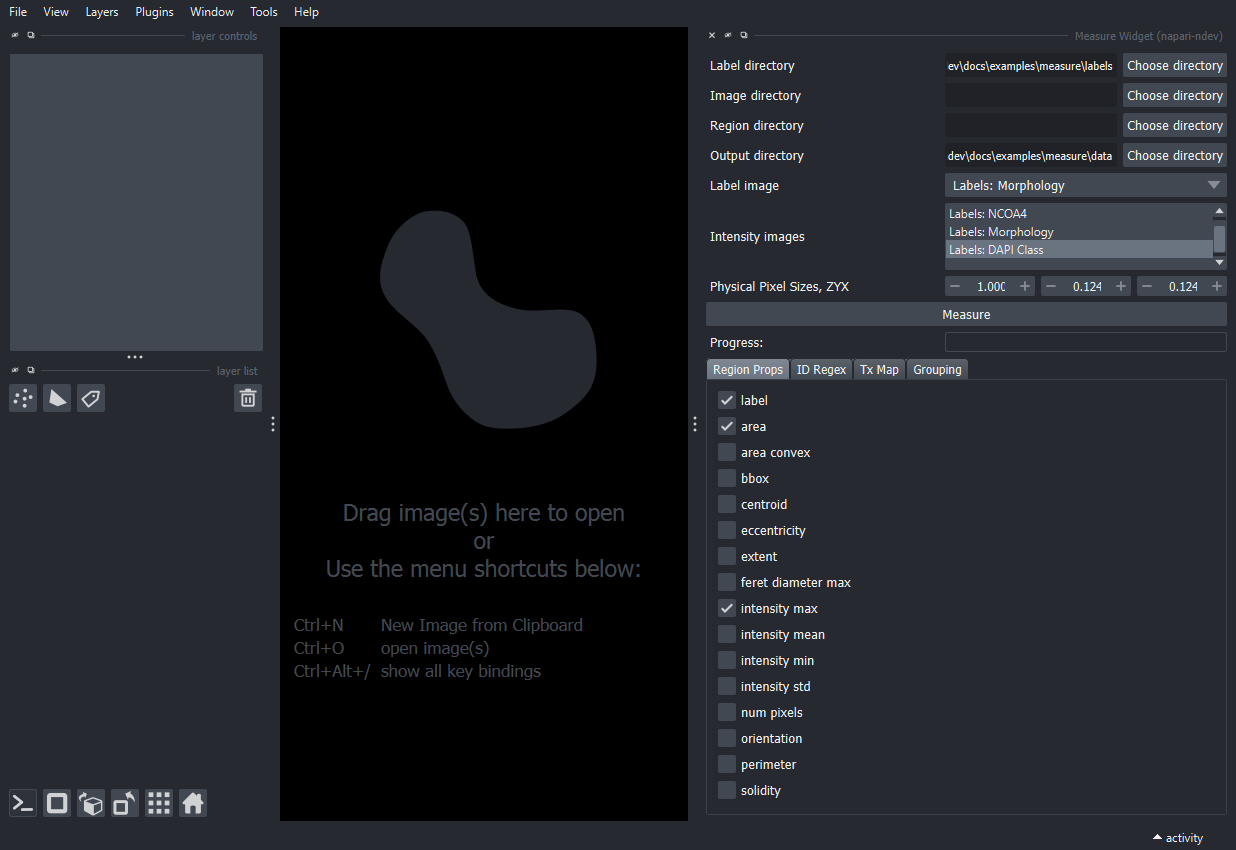

In [4]:
nbscreenshot(viewer)

## ID Regex

In this example, one such ID string is: `'2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 488 DAPI OBL_107_106_P1-H9.ome__0__Image:0'`
From here, I can extract multiple different bits of information, which is why saving interesting metadata into filenames can be useful. This needs to be a dictionary, where each key represents a column, and the value for that key is the regex (regular expression) pattern used to extract that information. The only quirk (besides regex) is that there must be at least 1 'group' aka a pattern surrounded by parenetheses. This pattern surrounded by parentheses is what will be saved into the column. As such, there can be extra regex that isn't kept, but can be used to locate the pattern. 

```
{
    'scene': r'(P\d{1,3}-\w+).ome',
    'well': r'-(\w+).ome',
    'HIC': r'(\d{1,3})HIC',
    'date': r'(\d{4}-\d{2}-\d{2})',
}
```

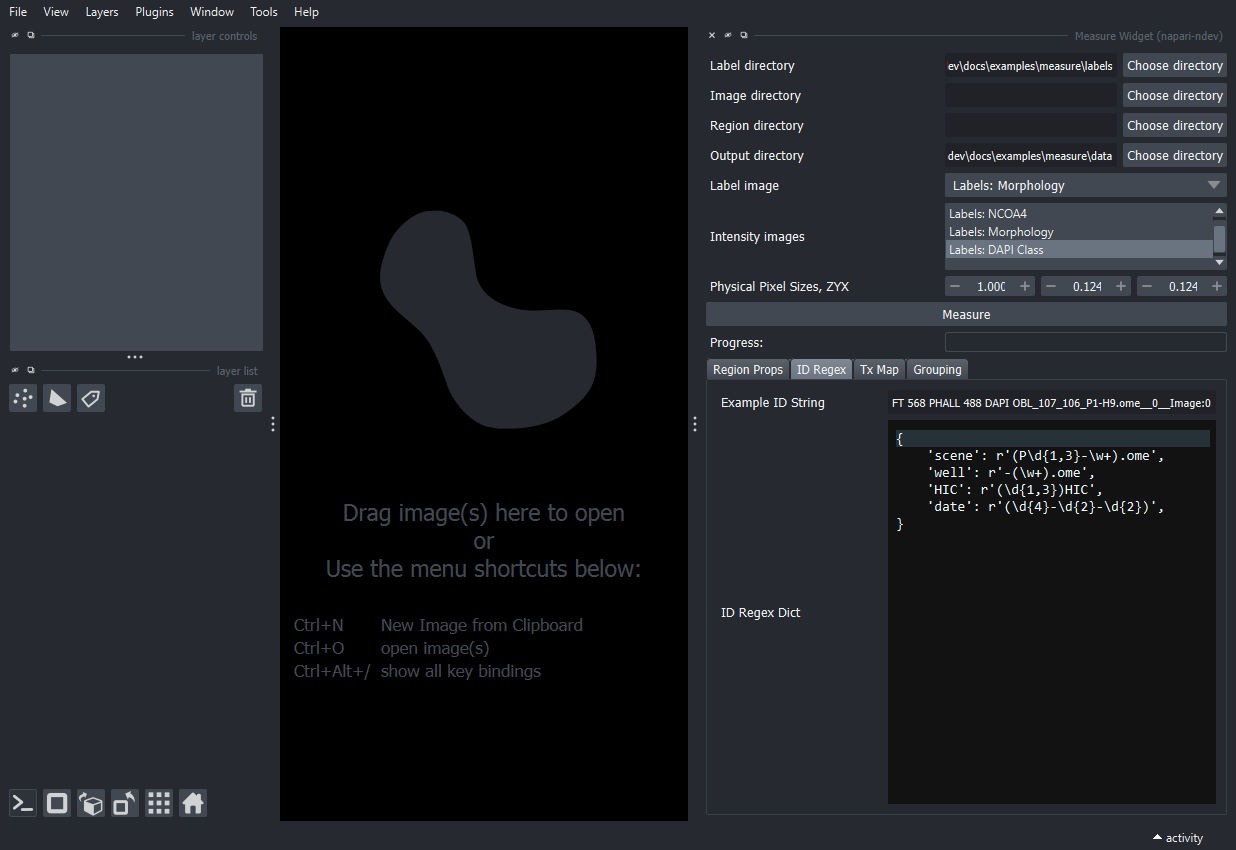

In [5]:
nbscreenshot(viewer)

## Tx Map

This section uses `napari_ndev:PlateMapper`. It is currently only set up to be used with typical culture plate dimensions, but will hopefully be updated in the future to be flexible to arbitrary patterns, so that a `Treatment ID` can include something like slide or section information that can then be mapped to treatments or positions of some kind. First, press the `Update Treatment ID Choices` to read possibilities from the `ID Regex` container. In the `treatment ID`, select the name of the column with the ID in it, which will usually be obtained from `ID Regex`, for this example it is 'well'. 

Then, select the number of wells for your plate, to automatically make a plate in the typical layout. For example, a 96-well plate would automatically map a A-H (8 row) plate with 12 columns.

For now, you provide lists of strings with ranges representing wells on a plate. For `PlateMapper` provide a dictionary, where each key represents a column header, and then the value-dictionary has a key which is what will get mapped to the matching well-value. For example:

```
{
  'chelation':{
    'Control': ['B1:C12'],
    '50uM DFP': ['D1:E12'],
    '100uM DFP': ['F1:G12'],
    '100uM DFO': ['A1:A12', 'H1:H12'],
  },
  'media':{
    'NGM': ['A1:H12'],
  }
}
```

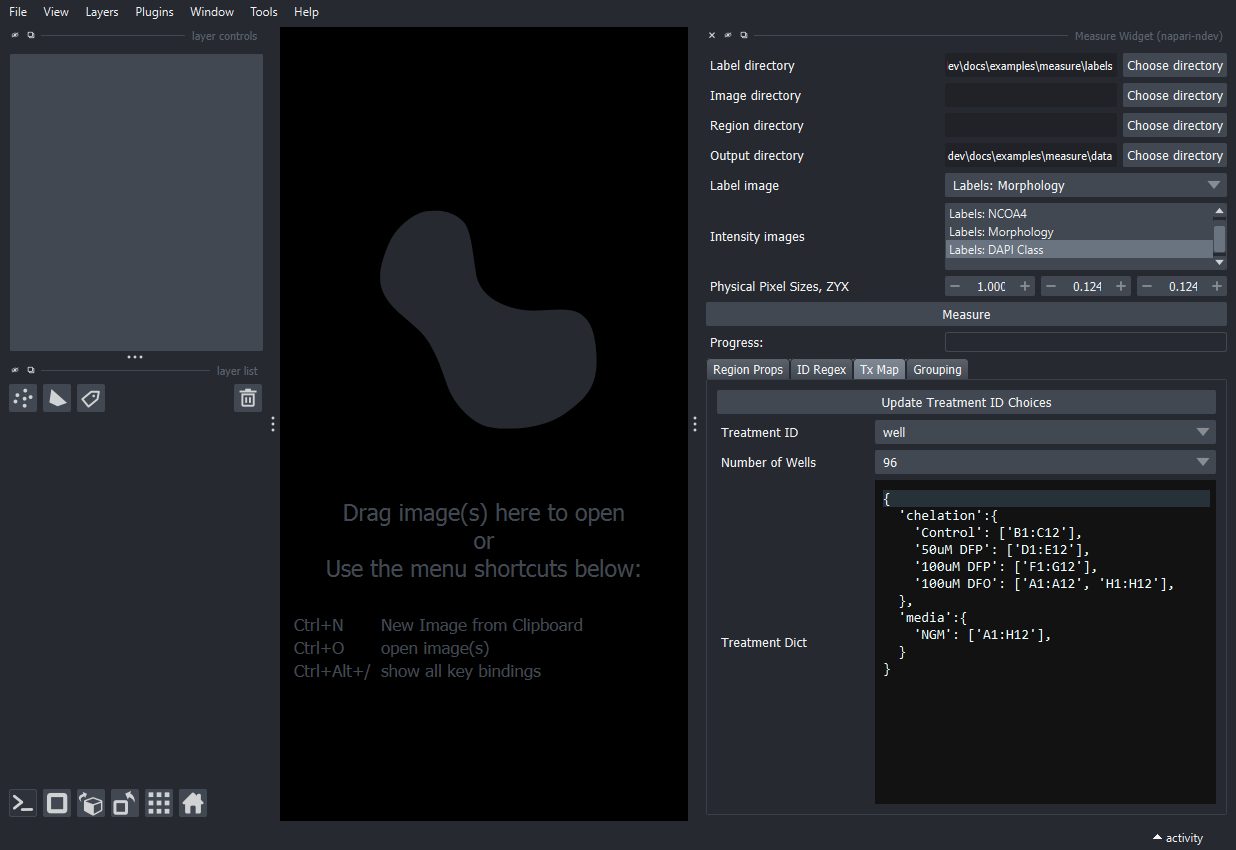

In [6]:
nbscreenshot(viewer)

## Finally, Measure

At any point once minimal selections were made, you could click the `Measure` button and it will measure all the labels in batch, and save the results to the output directory. 

# Grouping Data!

After acquiring your dataset, you may be interested in processing it further with the `Grouping` tab. This will reduce it from many rows, to much fewer. This example before has 1263 rows and 12 columns.

In [7]:
import pandas as pd

raw_data = pd.read_csv(r'./data\measure_props_Morphology.csv')
display(raw_data.shape)
raw_data.head()

(1263, 12)

,id,date,HIC,well,scene,label,area,intensity_max-DAPI Class,row,column,chelation,media
0,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,1,0.600632,0.0,H,9,100uM DFO,NGM
1,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,2,0.246413,0.0,H,9,100uM DFO,NGM
2,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,3,3.203368,0.0,H,9,100uM DFO,NGM
3,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,4,0.308016,0.0,H,9,100uM DFO,NGM
4,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,5,269.283163,1.0,H,9,100uM DFO,NGM


## Using the Grouping Tab

Load in your raw data of interest, and it will populate all the possible column names. Minimally, select grouping columns and the count column. 
For example, if I want to group by every 'id' (i.e. filename, with scene info) I would be able to leave the default values. 

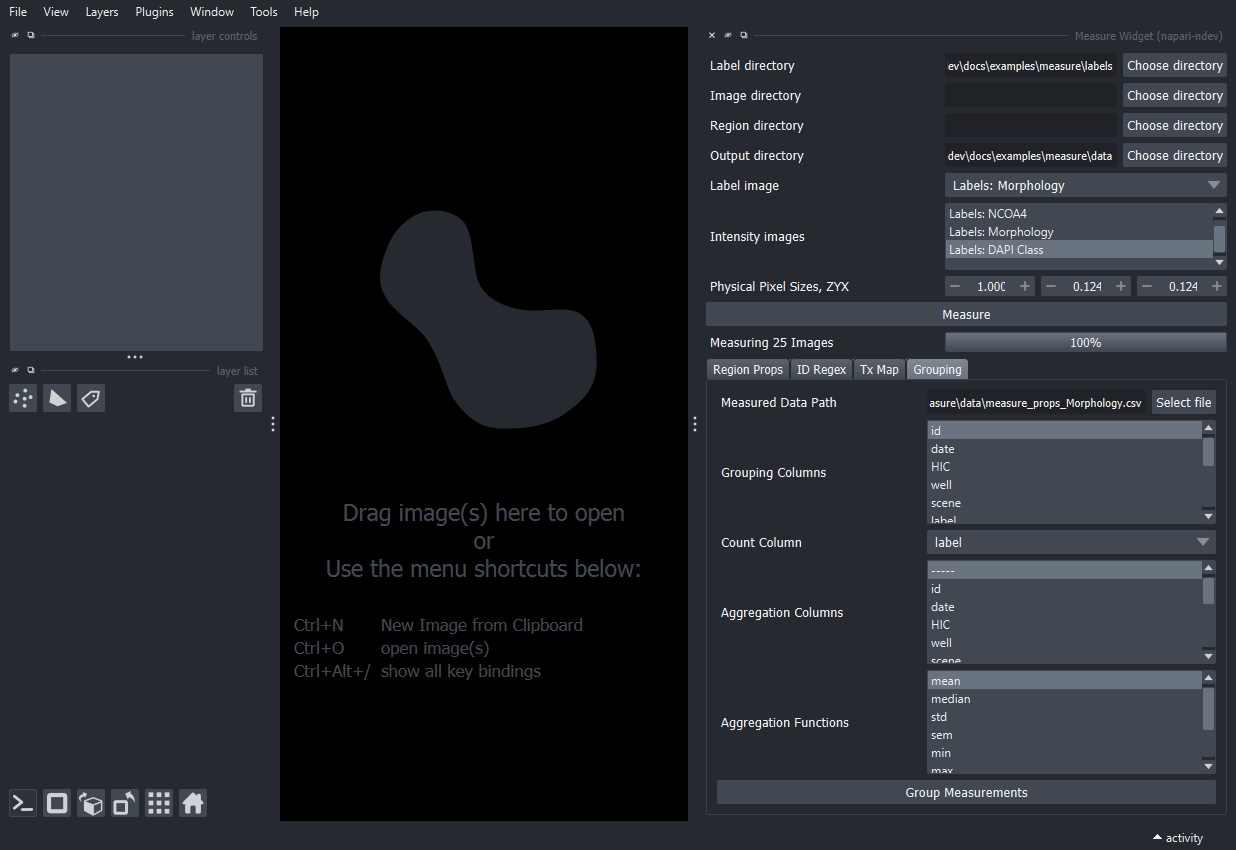

In [8]:
nbscreenshot(viewer)

In [9]:
grouped_data = pd.read_csv(r'./data\measure_props_Morphology_grouped.csv')
display(grouped_data.shape)
grouped_data.head()

(25, 2)

,id,label_count
0,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,16
1,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,14
2,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,40
3,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,20
4,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,14


## Advanced grouping

However, you will note that now *only* the 'id' and 'label_count' columns are present. If I instead wanted to keep all that careful metadata I extracted earlier, I would also want to select other grouping data, such as id, date, HIC, well, and scene, and 'intensity_max-DAPI Class' which represents the type of cell present.

And I could also select a column to aggregate, such as getting the 'mean' of the 'area' for each of these groups. Remember, if you keep the 'id' then minimally each *file* will get summarized. To have a more general summary (which would not typically be recommended), do not use 'id'. 

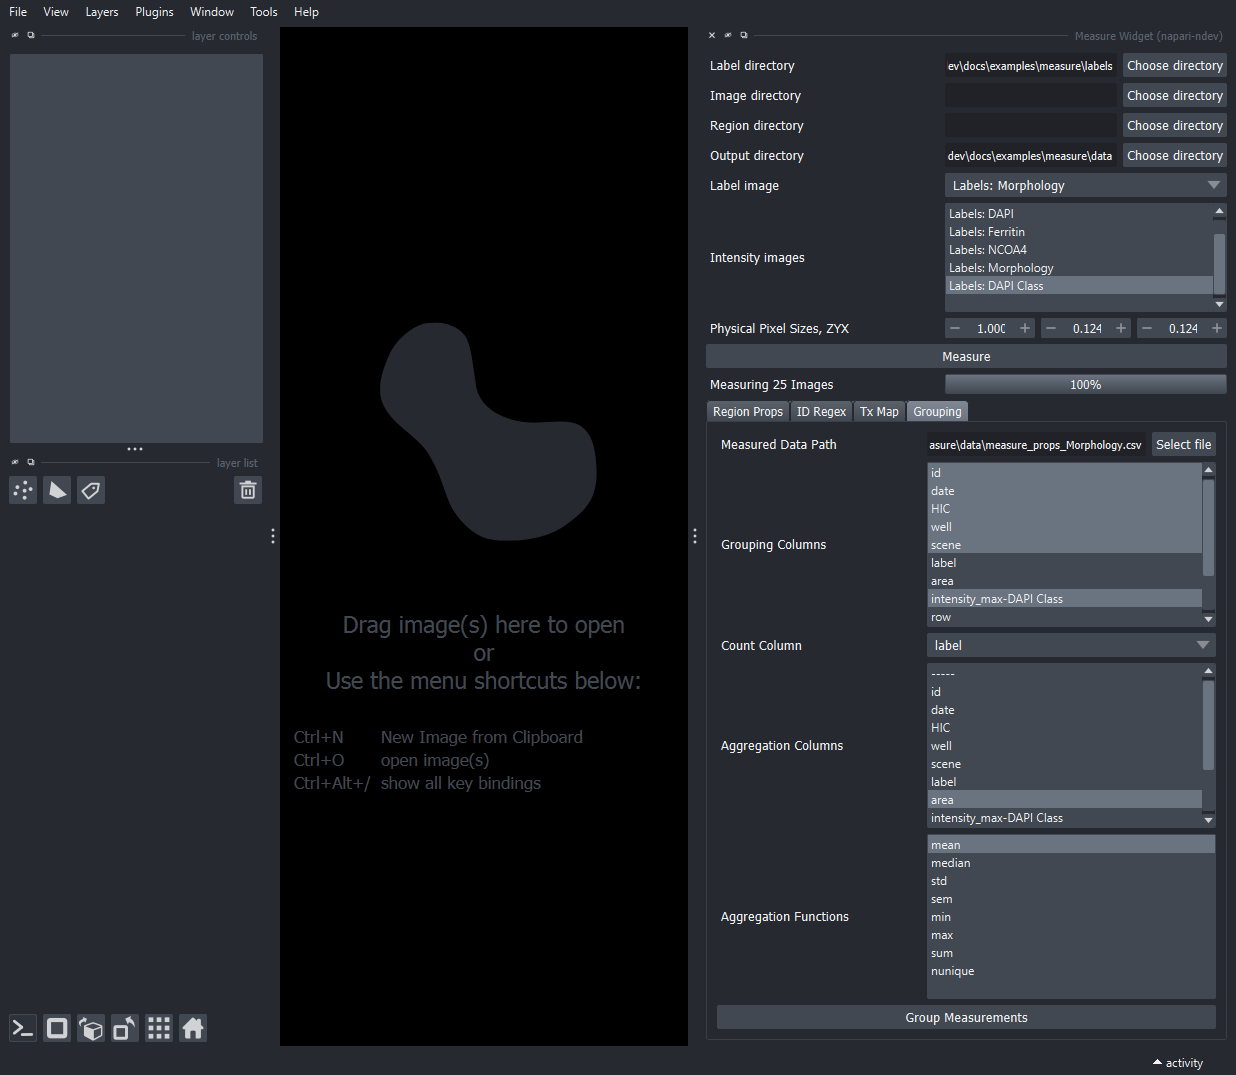

In [10]:
nbscreenshot(viewer)

In [12]:
grouped_data = pd.read_csv(r'./data\measure_props_Morphology_grouped.csv')
display(grouped_data.shape)
grouped_data

(47, 8)

,id,date,HIC,well,scene,intensity_max-DAPI Class,label_count,area_mean
0,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,0.0,15,9.641934
1,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,H9,P1-H9,1.0,1,269.283163
2,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,B9,P8-B9,0.0,12,1.036988
3,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,B9,P8-B9,1.0,2,461.962697
4,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,C9,P8-C9,0.0,39,0.576938
5,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,C9,P8-C9,1.0,1,297.451244
6,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,A9,P4-A9,0.0,18,3.002302
7,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,A9,P4-A9,1.0,2,446.762097
8,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,D9,P8-D9,0.0,12,6.541494
9,2024-08-07 25x 24HIC NCOA4 647 FT 568 PHALL 48...,2024-08-07,24,D9,P8-D9,1.0,2,439.747028


### Interpreting the results

Now, you should be able to place this easily into your stats program of choice (mine is using Python!). Note how we have shown in the first image that there are 15 labels with a DAPI class of zero, meaning that this label does not contain a nucleus and there is 1 label with a DAPI Class of 1 (meaning that it is alive, based on a previous classifier employed with APOC Widget). This also shows for example that the `area_mean` is larger for an alive cell, compared to whatever debris there must be that doesn't have a nucleus. 

This is also useful for grouping your data to double check that the results intuitively make sense. You should also make sure to check through your labels. You can try `napari-ndev:ImageOverview` for that. It will be added to the widgets soon, to quickly have overview .png files to scroll through on any system. 